In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

import warnings 
warnings.filterwarnings('ignore')

In [6]:
data= pd.read_csv(r"D:\Jupyter files 1\train.csv")

In [7]:
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
columns= ['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Marital_Status']

def change_datatype(data, columns, datatype):
    for column in columns:
        data[column]= data[column].astype(datatype)
    return data 

df= change_datatype(data, columns, 'category')

In [10]:
data.select_dtypes(object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [11]:
data.select_dtypes(np.number)

,User_ID,Purchase
0,1000001,8370
1,1000001,15200
2,1000001,1422
3,1000001,1057
4,1000002,7969
...,...,...
550063,1006033,368
550064,1006035,371
550065,1006036,137
550066,1006038,365


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category_1          550068 non-null  category
 9   Product_Category_2          376430 non-null  category
 10  Product_Category_3          166821 non-null  category
 11  Purchase                    550068 non-null  int64   
dtypes: category(5), int64(2), object(5)
memory usage: 32.0+ MB

In [13]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [14]:
num_cols= df.select_dtypes(np.number)

In [15]:
num_cols

,User_ID,Purchase
0,1000001,8370
1,1000001,15200
2,1000001,1422
3,1000001,1057
4,1000002,7969
...,...,...
550063,1006033,368
550064,1006035,371
550065,1006036,137
550066,1006038,365


In [16]:
cat_cols= df.select_dtypes(object)

In [17]:
cat_cols

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


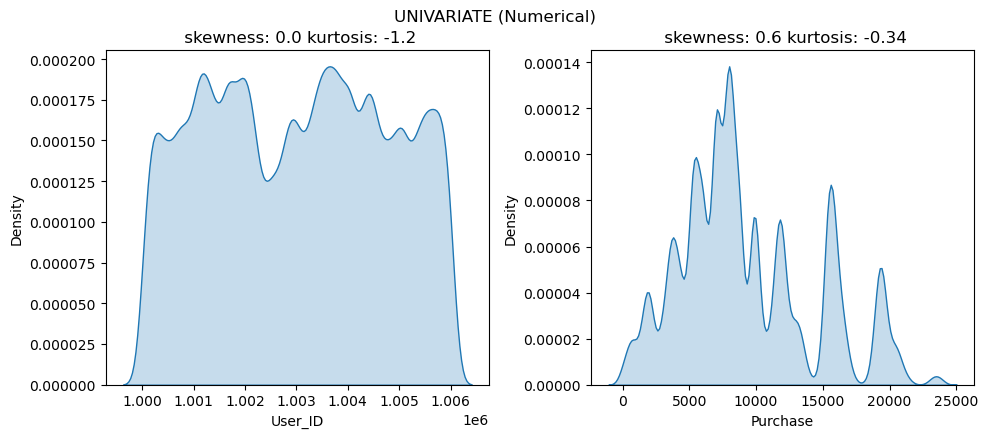

In [18]:
t= 1 
plt.figure(figsize=(10,12))
plt.suptitle('UNIVARIATE (Numerical)')
for i in num_cols:
    s,k= data[i].skew(), data[i].kurt()
    plt.subplot(3,2,t)
    sns.kdeplot(data= data, x= i, fill= True)
    plt.title(f' skewness: {round(s,2)} kurtosis: {round(k,2)}')
    t= t+1 

plt.tight_layout()
plt.show()

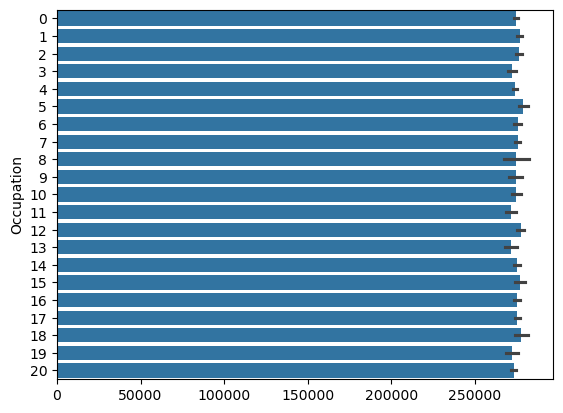

In [19]:
sns.barplot(df['Occupation'])
plt.show()

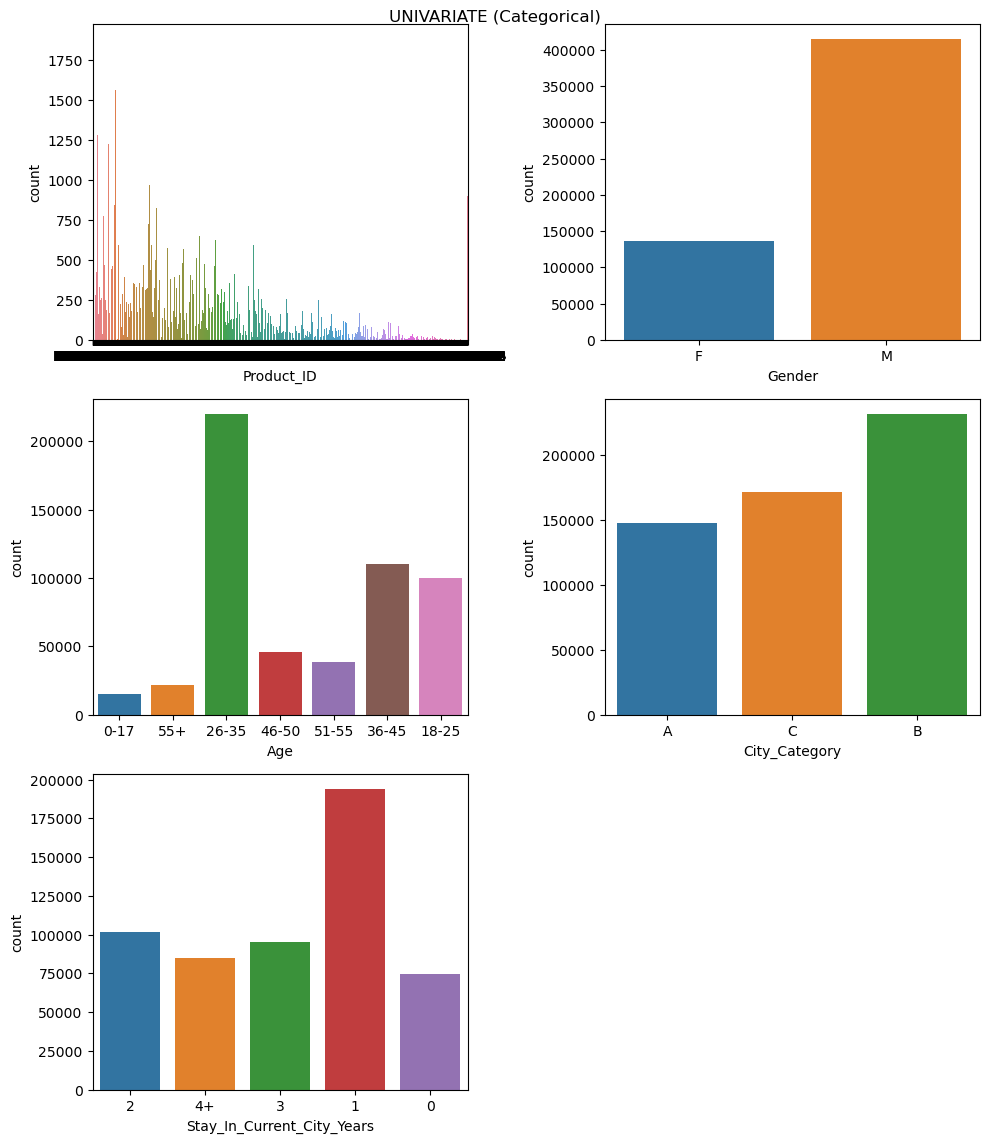

In [20]:
t= 1 
plt.figure(figsize=(10,15))
plt.suptitle('UNIVARIATE (Categorical)')
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data= data, x= i, hue= i)
    t= t+1 

plt.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder

def fitter(data,columns):
    saved_fitter= {}
    for column in columns:
        le= LabelEncoder()
        saved_fitter.update({column: le.fit(data[column])})
    return saved_fitter

def transform(data, columns, fitter: dict):
    for col in columns:
        data[col]= fitter[col].tranform(data[col])
    return data 

In [48]:
columns= ['Gender', 'Age', 'City_Category']


{'Occupation': LabelEncoder()}

In [50]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
